# Face detection on the basis of age, gender and ethnicity by CNN

# 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# 

# Read CSV File

In [2]:
df = pd.read_csv(r"C:\Users\shahi\age_gender.csv")

In [3]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df.shape

(23705, 5)

I don't need img_name column so i am going to drop that column.

# Drop  img_name Column

In [5]:
df = df.drop('img_name', axis=1)

In [6]:
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [7]:
df.shape

(23705, 4)

In [8]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
pixels       0
dtype: int64

In [9]:
df.age.value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

In [10]:
df.ethnicity.value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [11]:
df.gender.value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [12]:
df.pixels.value_counts()

10 21 33 31 42 54 66 75 73 73 80 87 91 96 102 104 112 117 124 132 132 128 132 138 139 132 128 124 117 109 111 75 22 31 81 97 87 78 67 51 39 38 28 18 26 41 30 19 21 31 37 39 46 52 69 72 72 72 76 81 85 89 94 96 101 105 116 128 132 127 128 130 136 137 121 117 116 107 107 95 66 76 94 87 76 71 63 51 47 44 30 21 28 26 21 15 22 31 30 34 45 55 76 75 75 76 77 82 86 92 94 94 102 104 111 120 125 127 126 125 130 133 122 118 118 105 91 95 98 93 81 73 74 71 69 67 59 40 20 26 26 12 18 11 17 23 17 23 42 64 75 76 77 78 80 86 89 91 90 89 97 102 103 104 113 122 123 123 125 123 115 110 106 104 103 98 90 82 77 78 77 78 75 70 64 41 14 23 25 15 17 12 15 15 12 20 50 71 71 78 88 95 96 97 100 103 102 101 107 112 112 110 109 116 120 122 120 113 109 106 103 103 103 98 94 91 86 87 79 73 69 69 69 48 20 9 19 14 12 14 17 8 12 28 55 79 79 83 91 98 98 100 107 113 115 112 115 122 125 123 112 109 111 113 111 113 114 112 112 108 109 108 106 101 100 89 82 76 67 67 74 62 25 4 9 11 11 14 17 5 18 52 80 86 81 73 68 67 77 86 99

# Dividing Target Variables

In [13]:
columns = ["age", "gender", "ethnicity"]
X = df.drop(columns, axis=1)
y = df.drop("pixels", axis=1)

In [14]:
X.head()

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...


In [15]:
y.head()

,age,ethnicity,gender
0,1,2,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0


In [16]:
y.nunique()

age          104
ethnicity      5
gender         2
dtype: int64

# Data Visualization

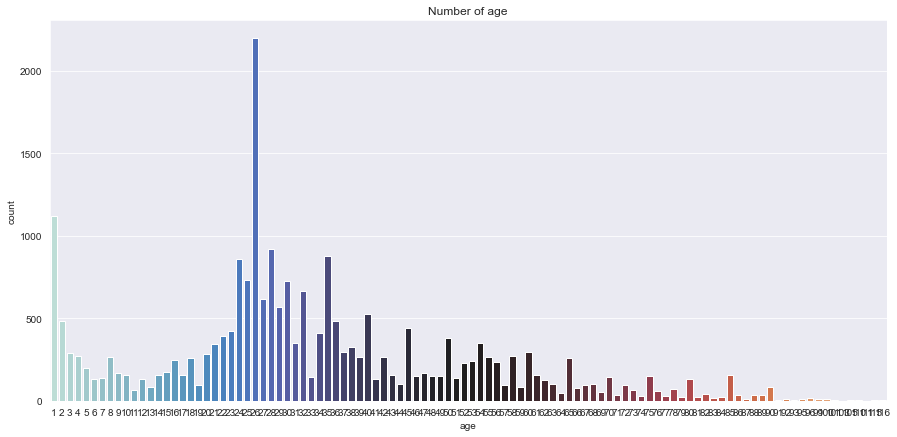

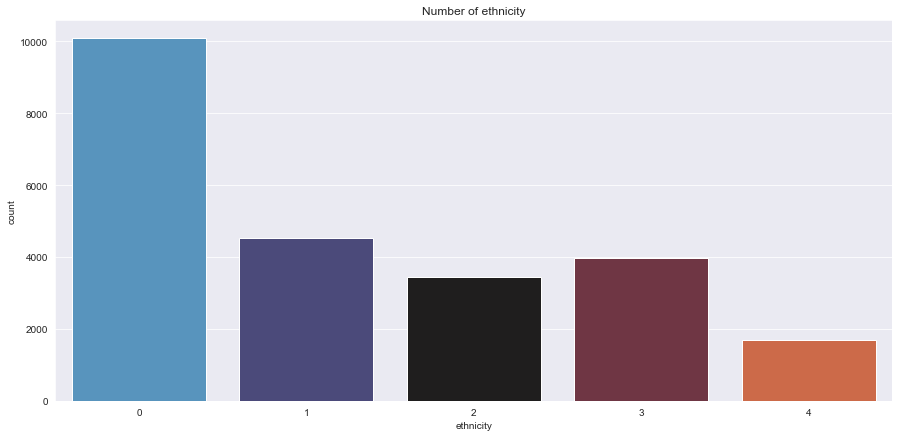

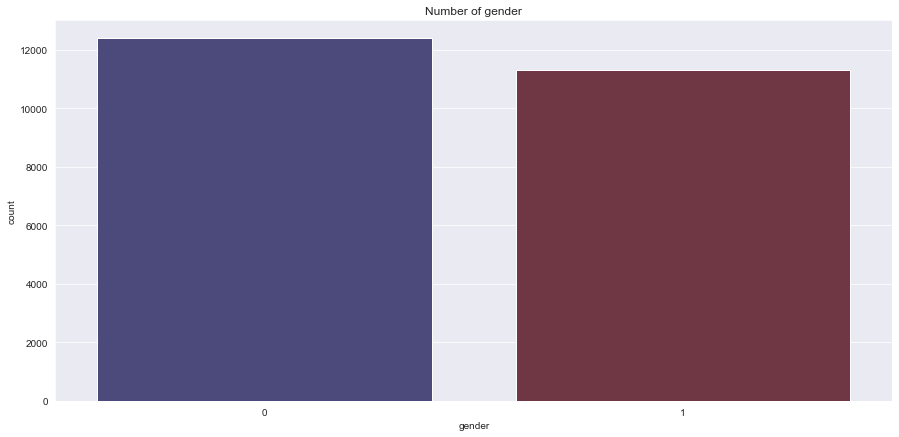

In [17]:
for i in y.columns:
    plt.figure(figsize=(15,7))
    g = sns.countplot(y[i], palette="icefire")
    plt.title("Number of {}".format(i))

Text(0.5, 1.0, 'Number of age')

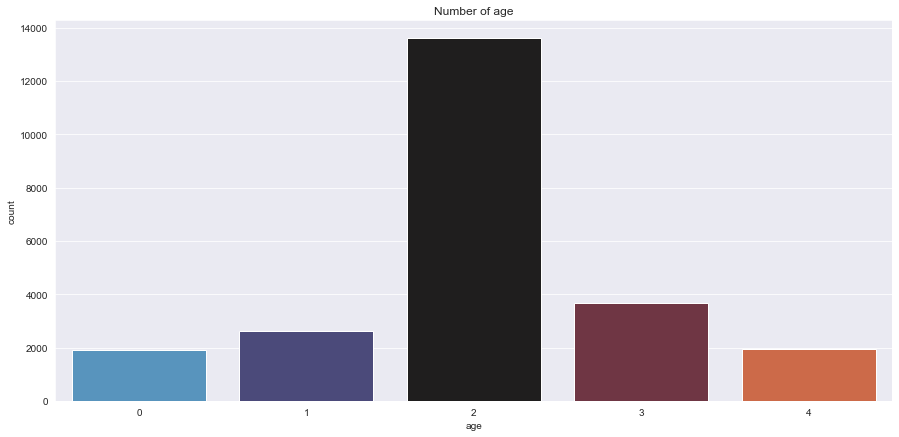

In [18]:
y["age"] = pd.cut(y["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])
plt.figure(figsize=(15,7))
g = sns.countplot(y["age"], palette="icefire")
plt.title("Number of age")

# Image shape

In [19]:
num_pixels = len(X['pixels'][0].split(" "))
img_height = int(np.sqrt(len(X['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(X['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


# Reshape data

In [20]:
X = pd.Series(X['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x:np.array(list(map(lambda z:np.int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

# reshape data
X = X.reshape(-1, 48, 48, 1)
print("X shape: ", X.shape)

X shape:  (23705, 48, 48, 1)


# Image Overview

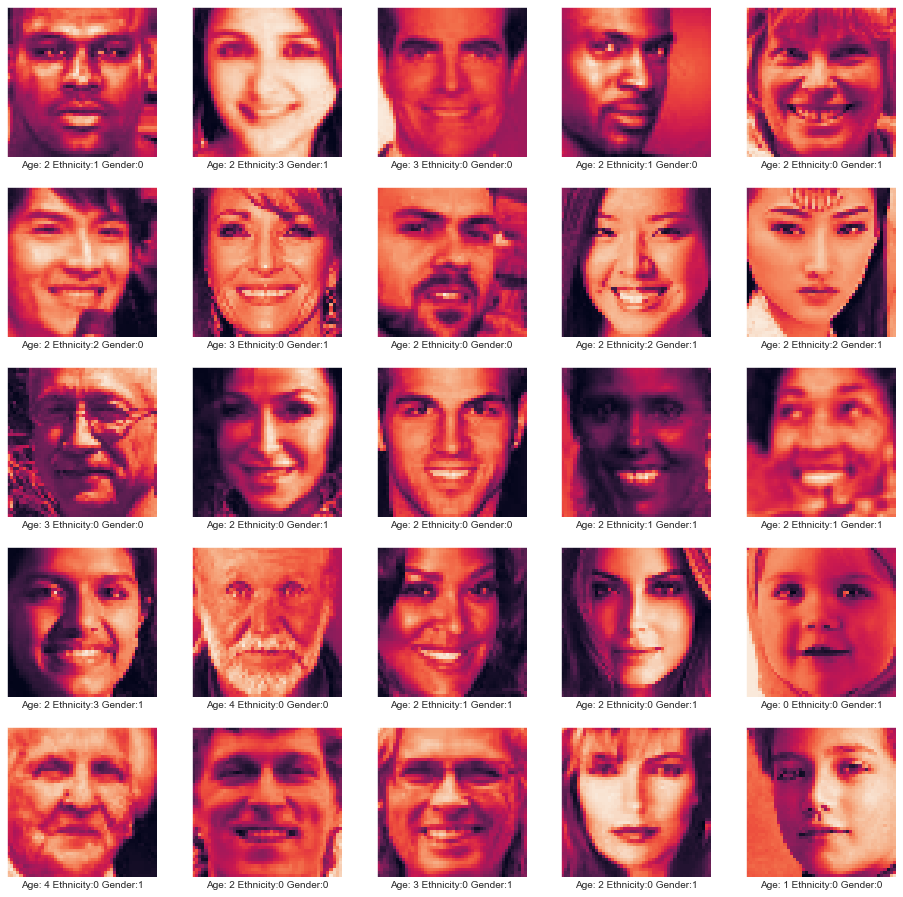

In [21]:
plt.figure(figsize=(16,16))
for i,a in zip(np.random.randint(0, 23705, 25), range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+
    " Ethnicity:"+str(y['ethnicity'].iloc[i])+
    " Gender:"+str(y['gender'].iloc[i]))
plt.show()

# Building Neural Networks for AGE, GENDER & ETHNICITY

In [22]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy

# Categorizing target values

In [24]:
age_matrix = np.array(y['age'])
gender_matrix = np.array(y['gender'])
ethnicity_matrix = np.array(y['ethnicity'])
age = to_categorical(age_matrix, num_classes = 5)
gender = to_categorical(y["gender"], num_classes = 2)
ethnicity = to_categorical(ethnicity_matrix, num_classes = 5)
print(age, gender, ethnicity)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


# Normalize the data

In [26]:
X = X / 255
X = X / 255

# Image Data Generator

In [27]:
datagen = ImageDataGenerator(
        featurewise_center = False,
    # set input mean to 0 over the dataset
       samplewise_center = False,
    # set each sample mean to 0 
       featurewise_std_normalization = False,
    # divide inputs by std of the dataset
       samplewise_std_normalization=False,  
    # divide each input by its std
       zca_whitening=False,
    # dimesion reduction
       rotation_range=5, 
    # randomly rotate images in the range 5 degrees
       zoom_range = 0.1,
    # Randomly zoom image 10%
       width_shift_range=0.1, 
    # randomly shift images horizontally 10%
       height_shift_range=0.1,  
    # randomly shift images vertically 10%
       horizontal_flip=False,  
    # randomly flip images
        vertical_flip=False  # randomly flip images
)

datagen.fit(X)

# Train Test Split

In [28]:
# Ethnicity
from sklearn.model_selection import train_test_split
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X,ethnicity, test_size=0.3, random_state=42)

# Gender
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, gender, test_size=0.3, random_state=42)

# Age
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, age, test_size=0.3, random_state=42)

In [29]:
print(X_train_ethnicity.shape, X_train_gender.shape, X_train_age.shape)

(16593, 48, 48, 1) (16593, 48, 48, 1) (16593, 48, 48, 1)


# Building CNN Model

In [30]:
def my_model(num_classes, activation, loss):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(num_classes, activation=activation))
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model 

# Callbacks

In [31]:
early_stopping = EarlyStopping(patience=10, 
                               min_delta=0.001,
                               restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                           patience = 2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr = 0.00001)

# Ethnicity Prediction

In [32]:
epochs = 500  # for better result increase the epochs
batch_size = 64
model_ethnicity = my_model(5,"softmax",'categorical_crossentropy')
history_ethnicity = model_ethnicity.fit(X_train_ethnicity, y_train_ethnicity, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test_ethnicity,y_test_ethnicity), steps_per_epoch= X_train_ethnicity.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/500
259/259 [==============================] - 73s 277ms/step - loss: 1.4712 - accuracy: 0.4170 - val_loss: 1.6041 - val_accuracy: 0.1436 - lr: 0.0010
Epoch 2/500
259/259 [==============================] - 71s 276ms/step - loss: 1.4588 - accuracy: 0.4220 - val_loss: 1.5238 - val_accuracy: 0.1436 - lr: 0.0010
Epoch 3/500
259/259 [==============================] - 70s 270ms/step - loss: 1.4569 - accuracy: 0.4230 - val_loss: 1.6849 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 4/500
259/259 [==============================] - 70s 272ms/step - loss: 1.4571 - accuracy: 0.4222 - val_loss: 1.6272 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 5/500
259/259 [==============================] - 71s 274ms/step - loss: 1.4549 - accuracy: 0.4222 - val_loss: 1.7314 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 6/500
259/259 [==============================] - 70s 271ms/step - loss: 1.4545 - accuracy: 0.4218 - val_loss: 6.8652 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 7/500
259/259 [=========================

In [33]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Plotting model performance

In [34]:
fig = px.line(
    history_ethnicity.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

# Loss & Accuracy

In [35]:
loss, acc = model_ethnicity.evaluate(X_test_ethnicity, y_test_ethnicity, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 1.4476364850997925
Test Accuracy: 0.43180540204048157


# Age Prediction

In [36]:
model_age = my_model(5,"softmax",'categorical_crossentropy')
history_age = model_age.fit(X_train_age, y_train_age, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test_age,y_test_age), 
                            steps_per_epoch= X_train_age.shape[0] // batch_size, 
                            callbacks= [early_stopping, 
                            learning_rate_reduction])

Epoch 1/500
259/259 [==============================] - 67s 254ms/step - loss: 1.2857 - accuracy: 0.5696 - val_loss: 1.6080 - val_accuracy: 0.0828 - lr: 0.0010
Epoch 2/500
259/259 [==============================] - 66s 254ms/step - loss: 1.2697 - accuracy: 0.5718 - val_loss: 1.5453 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 3/500
259/259 [==============================] - 66s 254ms/step - loss: 1.2707 - accuracy: 0.5712 - val_loss: 1.2609 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 4/500
259/259 [==============================] - 66s 254ms/step - loss: 1.2697 - accuracy: 0.5712 - val_loss: 2.8507 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 5/500
259/259 [==============================] - 67s 259ms/step - loss: 1.2652 - accuracy: 0.5730 - val_loss: 4.8020 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 6/500
259/259 [==============================] - 66s 255ms/step - loss: 1.2672 - accuracy: 0.5718 - val_loss: 11.1231 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 7/500
259/259 [========================

# Plotting model performance

In [37]:
fig = px.line(
    history_age.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

# Loss & Accuracy

In [38]:
loss, acc = model_age.evaluate(X_test_age, y_test_age, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 1.2609083652496338
Test Accuracy: 0.5781777501106262


# Gender Prediction

In [39]:
model_gender = my_model(2, "sigmoid", "binary_crossentropy")
history_gender = model_gender.fit(X_train_gender, y_train_gender, 
                                 batch_size = batch_size,
                                 epochs = epochs,
                                 validation_data = (X_test_gender, y_test_gender),
                                 steps_per_epoch = X_train_gender.shape[0] // batch_size, callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/500
259/259 [==============================] - 68s 259ms/step - loss: 0.6979 - accuracy: 0.5078 - val_loss: 0.6931 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 2/500
259/259 [==============================] - 66s 255ms/step - loss: 0.6932 - accuracy: 0.5153 - val_loss: 0.7038 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 3/500
259/259 [==============================] - 66s 256ms/step - loss: 0.6927 - accuracy: 0.5199 - val_loss: 0.9398 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 4/500
259/259 [==============================] - 66s 255ms/step - loss: 0.6937 - accuracy: 0.5125 - val_loss: 0.9321 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 5/500
259/259 [==============================] - 66s 255ms/step - loss: 0.6930 - accuracy: 0.5184 - val_loss: 2.4813 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 6/500
259/259 [==============================] - 69s 265ms/step - loss: 0.6924 - accuracy: 0.5216 - val_loss: 3.0436 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 7/500
259/259 [=========================

# Plotting model performance

In [40]:
fx = px.line(
    history_gender.history, y=["loss", "val_loss"],
    labels = {'index':'epoch', 'value':'loss'},
    title = 'Training History')

fig.show()

# Loss and Accuracy

In [41]:
loss, acc = model_gender.evaluate(X_test_gender, y_test_gender, verbose=0)
print("Test loss: {}".format(loss))
print("Test Accuracy: {}".format(acc))

Test loss: 0.6918245553970337
Test Accuracy: 0.5260123610496521


# 